## Name : Deep Nilesh Farkade

## Roll No. D21012

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [9]:
creditcard_df=pd.read_csv(r"C:\Users\admin\Desktop\Praxis all\2nd Semister\AIF\Assignment\Data\marketing.csv")

In [10]:
creditcard_df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

* Cust_ID: Identification of credit card holder
* Balance: Balance amount left in customer account to make purchases.
* Balance_Frequency: How frequently balance is updated i.e score between 0 to 1(1-frequently updated  0-not frequently updated)
* Purchases: Amount of purchases made from account
* ONEOFF_Purchases : Maximum purchase amount done in One-go
* Installment_purchases : Amount of Purchases done in installments
* Cash_Advance : cash in advance given by user.
* PURCHASES_FREQUENCY: How frequently the purchases are made score between 0 to 1
* ONEOFF_PURCHASES_FREQUENCY: How frequently the purchases are made on one-go
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently the purchases are made on installments.
* CASH_ADVANCE_FREQUENCY:How frequently the cash in advance are paid.
* CASH_ADVANCE_TRX: Numer of transaction made with cash advance
* PURCHASES_TRX: Number of purchase transaction made
* Credit_Limit: Limit of Credit card for user
* PAYMENTS: Amount of payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payment done by user.
* PRC_FULL_PAYMENT: Percent of full payment done by user
* Tenure : Tenure of credit-card service for user

In [11]:
creditcard_df.shape

(8950, 18)

From above table we can see that
* Mean banlace of all customer is 1564
* Most all customer update their balance at rate of 0.87
* Average purchase is 1000
* Average amount of purchases in one go is 592
* Average purchase frequency is around 0.5
* Averaage credit limit is around 4500
* Percentage of full payment is 15%
* Average tenure is 11-12 years

and many more we can check to learn

## Visualize and Explore Dataset

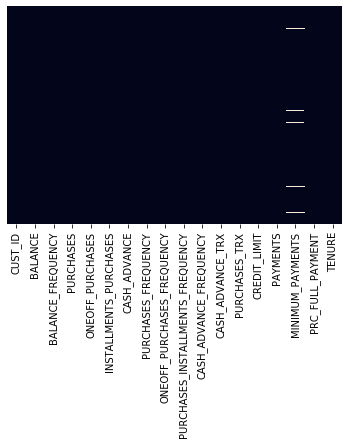

In [14]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False)

In [15]:
# from above graph there is some missing value in payment feature

In [16]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
# total there is 313 missing values in minimum payments variable and 1 missing in credit limit

In [18]:
# Lets fill this missing values
creditcard_df.loc[creditcard_df['MINIMUM_PAYMENTS'].isnull()==True,'MINIMUM_PAYMENTS']=creditcard_df.MINIMUM_PAYMENTS.mean()

In [19]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
# Lets fill this missing values of credit limit
creditcard_df.loc[creditcard_df['CREDIT_LIMIT'].isnull()==True,'CREDIT_LIMIT']=creditcard_df.CREDIT_LIMIT.mean()

In [21]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

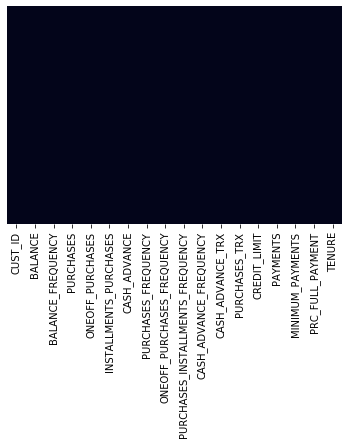

In [22]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False)

In [23]:
# From above graph there is no ticks so there is no missing values

In [24]:
# Lets check we have duplicate entries or not
creditcard_df.duplicated().sum()

0

In [25]:
# Cust id is not containing any info so we can remove this feature
creditcard_df.drop('CUST_ID',inplace=True,axis=1)

In [26]:
creditcard_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
6      627.260806           1.000000    7091.01           6402.63   
7     1823.652743           1.000000     436.20              0.00   
8     1014.926473           1.000000     861.49            661.49   
9      152.225975           0.545455    1281.60           1281.60   
10    1293.124939           1.000000     920.12              0.00   
11     630.794744           0.818182    1492.18           1492.18   
12    1516.928620           1.000000    3217.99           2500.23   
13     921.693369           1.000000    2137.93            419.96   
14    2772.772734           1.000000       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
16    2072.074354           0.875000       0.00              0.00   
17      41.089489           0.454545     519.00              0.00   
18    1989.072228           1.000000     504.35            166.00   
19    3577.970933           1.000000     398.64              0.00   
20    2016.684686           1.000000     176.68              0.00   
21    6369.531318           1.000000    6359.95           5910.04   
22     132.342240           0.636364     815.90              0.00   
23    3800.151377           0.818182    4248.35           3454.56   
24    5368.571219           1.000000       0.00              0.00   
25     169.781679           1.000000     399.60              0.00   
26    1615.967240           1.000000     102.00            102.00   
27     125.694817           1.000000     233.28              0.00   
28    7152.864372           1.000000     387.05            204.55   
29      22.063490           1.000000     100.00              0.00   
...           ...                ...        ...               ...   
8920  1055.087681           0.666667       0.00              0.00   
8921     3.417407           0.500000      57.42              0.00   
8922    33.812837           1.000000     145.98              0.00   
8923   486.661842           0.833333    1898.88            939.09   
8924     7.336804           0.333333      74.00             74.00   
8925   101.564003           1.000000     418.59              0.00   
8926    53.097361           0.833333     580.00              0.00   
8927    91.639086           1.000000     315.20            147.80   
8928    62.320028           1.000000     500.00              0.00   
8929   371.527312           0.333333       0.00              0.00   
8930   229.540018           1.000000      84.00              0.00   
8931    46.814144           0.833333     235.80              0.00   
8932    39.552396           1.000000     180.00              0.00   
8933   735.652303           1.000000     619.60            255.62   
8934    20.260716           0.833333     110.50              0.00   
8935   183.817004           1.000000     465.90              0.00   
8936   108.977282           1.000000     712.50              0.00   
8937   163.001629           0.666667       0.00              0.00   
8938    78.818407           0.500000       0.00              0.00   
8939   728.352548           1.000000     734.40            734.40   
8940   130.838554           1.000000     591.24              0.00   
8941  5967.475270           0.833333     214.55              0.00   
8942    40.829749           1.000000     113.28              0.00   
8943     5.871712           0.500000      20.90             20.90   
8944   193.571722           0.833333    1012.73           1012.73   
8945    28.493517           1.000000     291.12              0.00   
8946    

Lets try to do univaraite analysis and bivariate analysis by using KDE(Kernek Density Estimate)
Kernel Density Estimate is same like histogram but it more accurate as it is plotting distribution of each continous variable not in range just like histogram

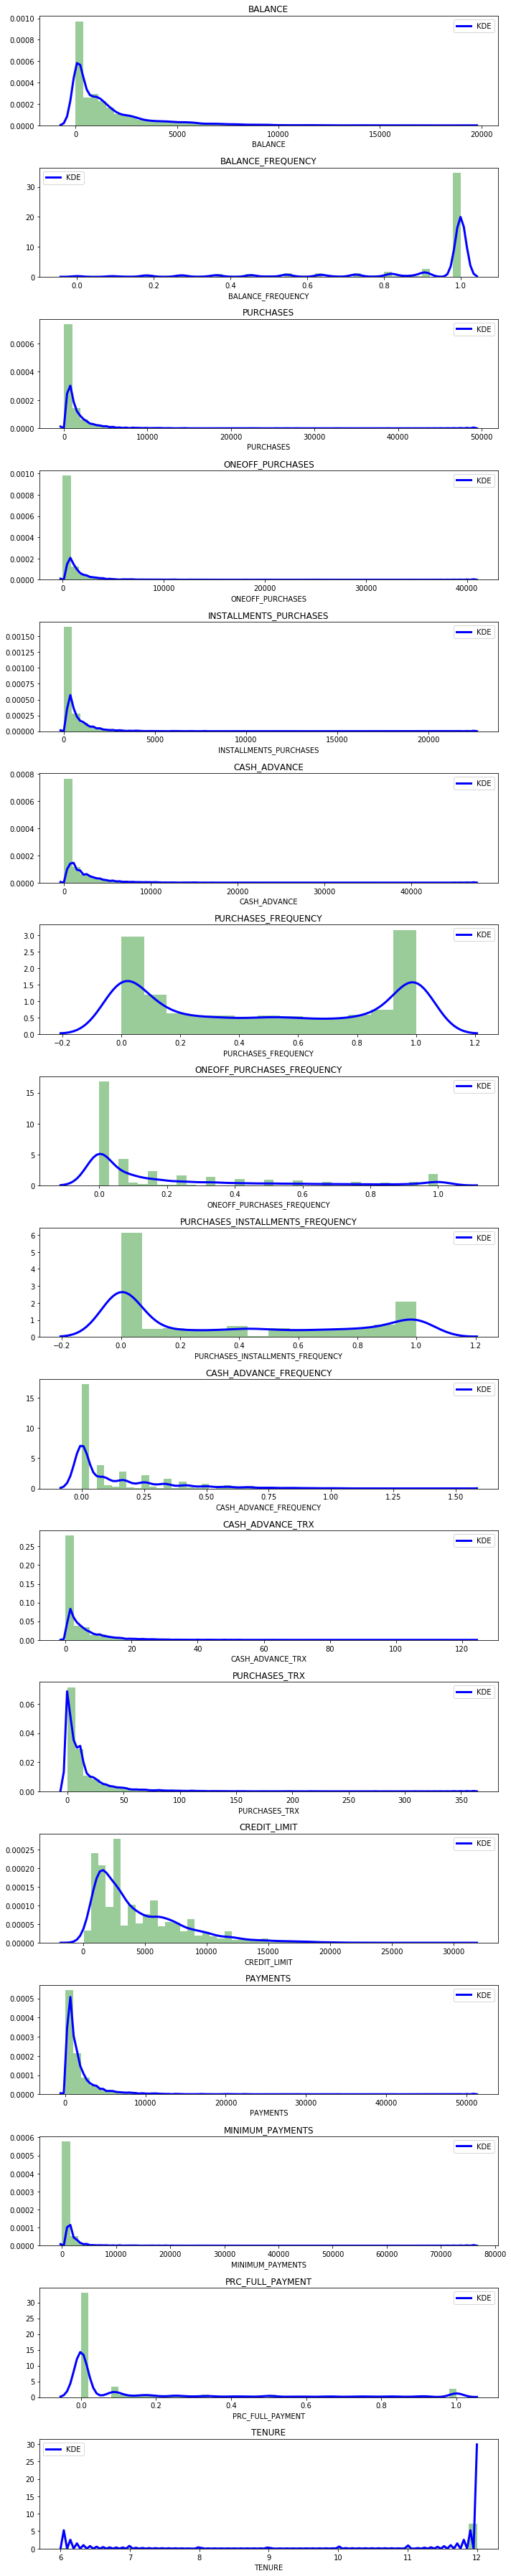

In [27]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b',"lw":3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()

* From above graph we can see all the feature distribution
* Important is that in purchase frequency there are 2 equal clusters who have freq 0 as well as 1
* and in Purchase installment freq also there are some 2 clusters

In [28]:
# Lets find correlation table between all variables

In [29]:
correltions = creditcard_df.corr()

In [30]:
correltions

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

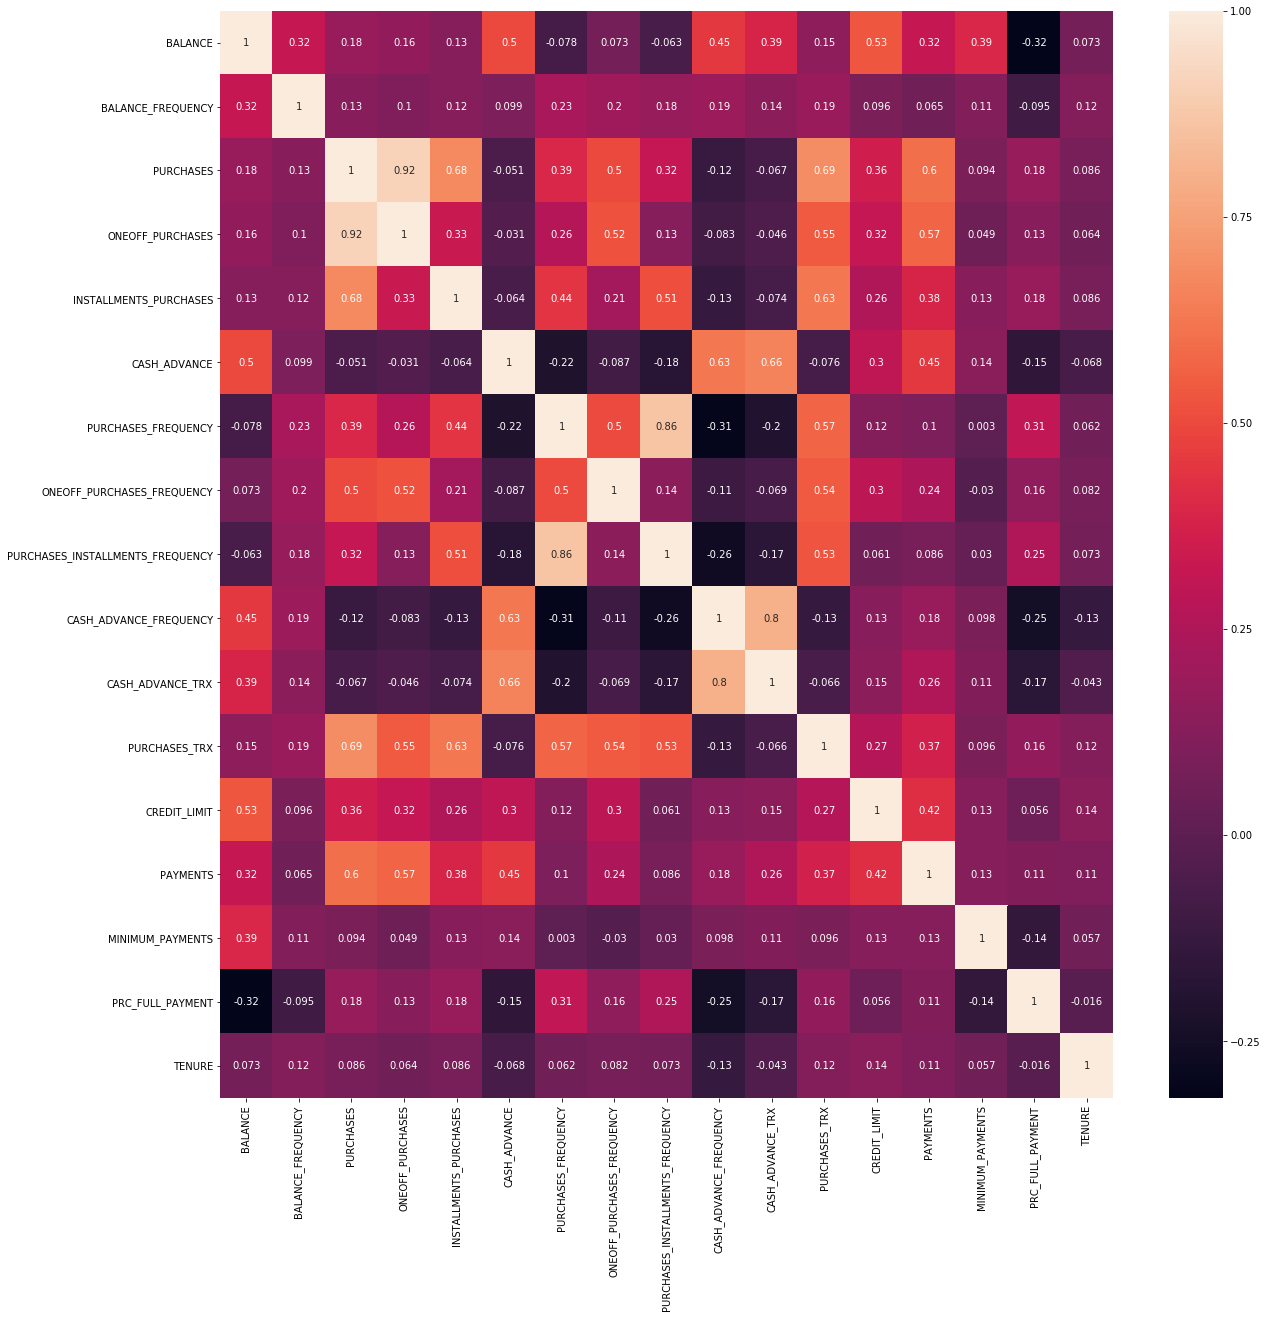

In [31]:
plt.subplots(figsize=(20,20))
sns.heatmap(correltions,annot=True)# Annot is used to get the numbers

In [32]:
# From above table we can see that light the color good is the correlation and dark the color bad is the correlation

In [33]:
#lets scale the data first
scalar=StandardScaler()
creditcard_df_scaled=scalar.fit_transform(creditcard_df)

In [34]:
creditcard_df_scaled.shape

(8950, 17)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\pairw

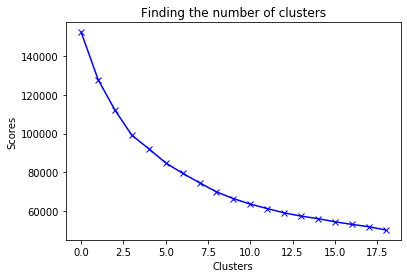

In [35]:
scores_1=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)#Inertia means sum of squares difference within clusters
    
plt.plot(scores_1,'bx-')#this bhx- gives dot on grap
plt.title('Finding the number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [36]:
# From above graph we are getting optimum value of k i.e 7 or 8
#so now lets fit model on optimum value of k

In [37]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\pairw

In [38]:
labels.shape

(8950,)

In [39]:
kmeans.cluster_centers_ #will get all the 17 variables cluster centres

array([[ 1.50719223e-02,  4.03997820e-01, -3.61188326e-01,
        -2.47133470e-01, -3.99886194e-01, -9.15475020e-02,
        -8.61995427e-01, -4.09591715e-01, -7.53578775e-01,
         1.07785080e-01, -2.61948756e-02, -4.85535621e-01,
        -3.06569828e-01, -2.50424503e-01, -1.03649067e-02,
        -4.56907742e-01,  2.73510543e-01],
       [-7.01022079e-01, -2.14283692e+00, -3.11070888e-01,
        -2.35784596e-01, -3.02229603e-01, -3.22027427e-01,
        -5.56094649e-01, -4.44950105e-01, -4.39068587e-01,
        -5.20974576e-01, -3.76187164e-01, -4.19594955e-01,
        -1.75962808e-01, -2.01751905e-01, -2.56641393e-01,
         2.80867094e-01,  1.99336189e-01],
       [-1.61258422e-01,  3.91840745e-01,  4.53685136e-01,
         5.93268355e-01, -1.73604682e-02, -3.32048429e-01,
         9.41220401e-01,  1.87419266e+00,  8.95637854e-02,
        -4.06120911e-01, -3.22193759e-01,  5.24384905e-01,
         3.77442273e-01,  8.74959012e-02, -1.61829631e-01,
         4.03800394e-01,  2.6

In [40]:
kmeans.cluster_centers_.shape

(8, 17)

In [41]:
#Lets make the data frame of this cluster centre to understand and give the column names
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0  0.015072          0.403998  -0.361188        -0.247133   
1 -0.701022         -2.142837  -0.311071        -0.235785   
2 -0.161258          0.391841   0.453685         0.593268   
3 -0.365304          0.333189  -0.036222        -0.244327   
4 -0.336050         -0.347078  -0.289267        -0.215966   
5  0.901817          0.466986   2.270963         1.756936   
6  1.685522          0.392008  -0.219500        -0.157912   
7  1.923051          0.337717  11.212042        10.600367   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.399886    -0.091548           -0.861995   
1              -0.302230    -0.322027           -0.556095   
2              -0.017360    -0.332048            0.941220   
3               0.363038    -0.364848            0.997189   
4              -0.286835     0.068284           -0.203078   
5               2.141920    -0.195512            1.158629   
6              -0.228961     2.016298           -0.480418   
7               7.033118     0.419625            1.046983   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.409592                        -0.753579   
1                  -0.444950                        -0.439069   
2                   1.874193                         0.089564   
3                  -0.387824                         1.213089   
4                  -0.288661                        -0.224549   
5                   1.583889                         1.226198   
6                  -0.215992                        -0.415869   
7                   1.915501                         0.981334   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.107785        -0.026195     -0.485536    -0.306570   
1              -0.520975        -0.376187     -0.419595    -0.175963   
2              -0.406121        -0.322194      0.524385     0.377442   
3              -0.475819        -0.361682      0.190151    -0.261821   
4               0.308663         0.000996     -0.388117    -0.567159   
5              -0.312181        -0.212097      2.781452     1.238947   
6               1.918659         1.933763     -0.268325     1.024591   
7              -0.258912         0.061229      5.362438     3.044064   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.250425        -0.010365        -0.456908  0.273511  
1 -0.201752        -0.256641         0.280867  0.199336  
2  0.087496        -0.161830         0.403800  0.260639  
3 -0.216677        -0.031399         0.319714  0.256865  
4 -0.392680        -0.209145         0.014011 -3.203733  
5  1.290295         0.441655         0.304778  0.334182  
6  0.821529         0.554114        -0.391524  0.070038  
7  8.098975         1.120318         1.110132  0.310863

In [42]:
# we doesnt understand the above numbers so lets inverse transform it

In [43]:
cluster_centers=scalar.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1595.845762          0.972974    231.520407       182.246427   
1   105.356543          0.369652    338.597087       201.083235   
2  1228.829033          0.970094   1972.510118      1577.141330   
3   804.125571          0.956200    925.815397       186.903808   
4   865.015978          0.795051    385.181720       233.977974   
5  3441.530986          0.987896   5855.151608      3508.591111   
6  5072.746521          0.970134    534.238711       330.334983   
7  5567.142164          0.957273  24957.905000     18186.875667   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              49.455521   786.891724            0.144390   
1             137.765165   303.564554            0.267163   
2             395.368789   282.550045            0.868108   
3             739.358006   213.768492            0.890571   
4             151.686061  1122.064941            0.408846   
5            2347.978936   568.874079            0.955365   
6             204.020725  5207.141207            0.297536   
7            6771.029333  1858.844605            0.910556   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.080269                         0.064946   
1                   0.069720                         0.189940   
2                   0.761566                         0.400032   
3                   0.086762                         0.846550   
4                   0.116344                         0.275196   
5                   0.674962                         0.851760   
6                   0.138023                         0.199161   
7                   0.773889                         0.754444   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.156713         3.070066      2.641233   3379.022989   
1               0.030892         0.681626      4.280271   3854.224762   
2               0.053875         1.050091     27.744080   5867.738864   
3               0.039928         0.780610     19.436282   3541.839181   
4               0.196911         3.255627      5.062701   2430.891398   
5               0.072674         1.801418     83.846336   9002.245863   
6               0.519087        16.445339      8.040276   8222.329742   
7               0.083333         3.666667    148.000000  15570.000000   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1008.189452       840.051564         0.020077  11.883346  
1   1149.091856       266.114602         0.235863  11.784081  
2   1986.435913       487.069414         0.271819  11.866120  
3   1105.885986       791.032739         0.247226  11.861069  
4    596.373827       376.802926         0.157813   7.229904  
5   5468.421612      1893.464949         0.242857  11.964539  
6   4111.389774      2155.545500         0.039200  11.611047  
7  25178.882690      3475.059479         0.478409  11.933333

In [44]:
# This is the way we have divided the customers into 8 segments
# like  group 1 have moderate balance frequency is also good.Just keep care of that money by not giving more interest,etc
# Like  group  0 is group of less tenure and do less amount of purchase,etc.

In [45]:
labels.shape #this is the cluster number of each row in our data

(8950,)

In [46]:
# Concatenate this labes in our data
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
creditcard_df_cluster.head(50)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      40.900749           0.818182      95.40              0.00   
1    3202.467416           0.909091       0.00              0.00   
2    2495.148862           1.000000     773.17            773.17   
3    1666.670542           0.636364    1499.00           1499.00   
4     817.714335           1.000000      16.00             16.00   
5    1809.828751           1.000000    1333.28              0.00   
6     627.260806           1.000000    7091.01           6402.63   
7    1823.652743           1.000000     436.20              0.00   
8    1014.926473           1.000000     861.49            661.49   
9     152.225975           0.545455    1281.60           1281.60   
10   1293.124939           1.000000     920.12              0.00   
11    630.794744           0.818182    1492.18           1492.18   
12   1516.928620           1.000000    3217.99           2500.23   
13    921.693369           1.000000    2137.93            419.96   
14   2772.772734           1.000000       0.00              0.00   
15   6886.213231           1.000000    1611.70              0.00   
16   2072.074354           0.875000       0.00              0.00   
17     41.089489           0.454545     519.00              0.00   
18   1989.072228           1.000000     504.35            166.00   
19   3577.970933           1.000000     398.64              0.00   
20   2016.684686           1.000000     176.68              0.00   
21   6369.531318           1.000000    6359.95           5910.04   
22    132.342240           0.636364     815.90              0.00   
23   3800.151377           0.818182    4248.35           3454.56   
24   5368.571219           1.000000       0.00              0.00   
25    169.781679           1.000000     399.60              0.00   
26   1615.967240           1.000000     102.00            102.00   
27    125.694817           1.000000     233.28              0.00   
28   7152.864372           1.000000     387.05            204.55   
29     22.063490           1.000000     100.00              0.00   
30  12136.219960           1.000000    3038.01           1013.20   
31   1162.273324           1.000000    1347.71            400.00   
32   6732.823064           1.000000     324.95            324.95   
33    125.660453           1.000000     636.79            636.79   
34   3517.101616           0.727273     547.28              0.00   
35   1656.350781           1.000000       0.00              0.00   
36   7427.076941           1.000000       0.00              0.00   
37   4047.480828           1.000000    2380.55           1642.17   
38   6269.418144           1.000000     204.00            204.00   
39   1411.602230           0.454545     963.24            963.24   
40    663.447810           0.727273       0.00              0.00   
41    784.889762           0.909091    1526.59            786.30   
42   4104.710798           1.000000     203.82            203.82   
43   1360.742377           1.000000       0.00              0.00   
44   5315.945594           1.000000    1525.44            469.80   
45   2242.311686           1.000000     437.00             97.00   
46    474.447149           0.500000     109.74              0.00   
47   3910.111237           1.000000       0.00              0.00   
48    229.867179           1.000000    2390.60           1402.93   
49    863.809833           1.000000     507.50            507.50   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40      0.000000             0.166667   
1                     0.00   6442.945483             0.000000   
2                     0.00      0.000000             1.000000   
3                     0.00    205.788017             0.083333   
4                     0.00      0.000000             0.083333   
5                  1333.28      0.000000             0.666667   
6                   688.38      0.000000             1.000000   
7                   

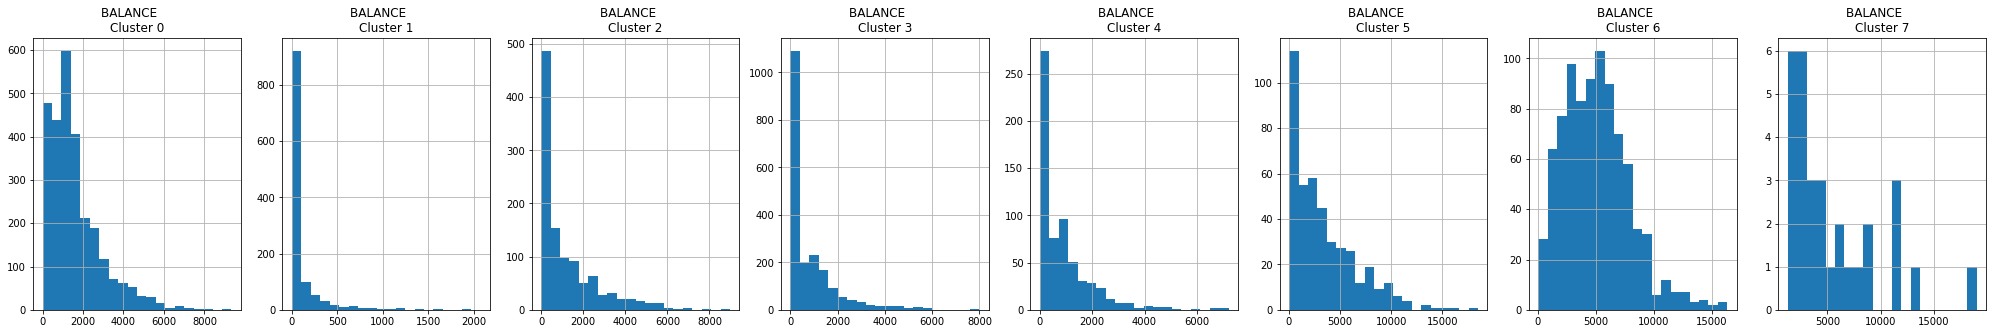

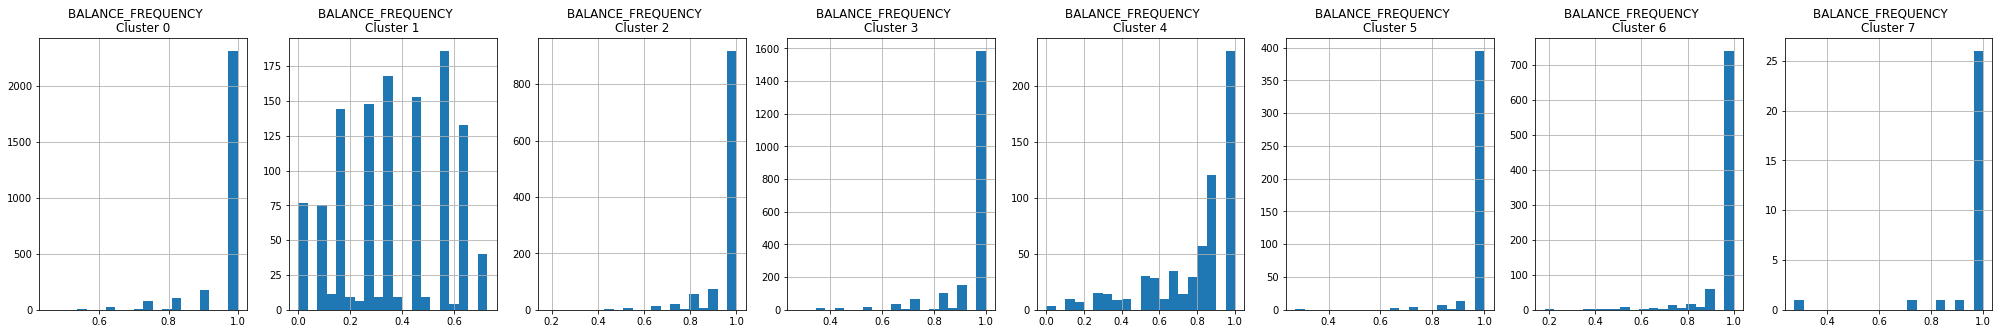

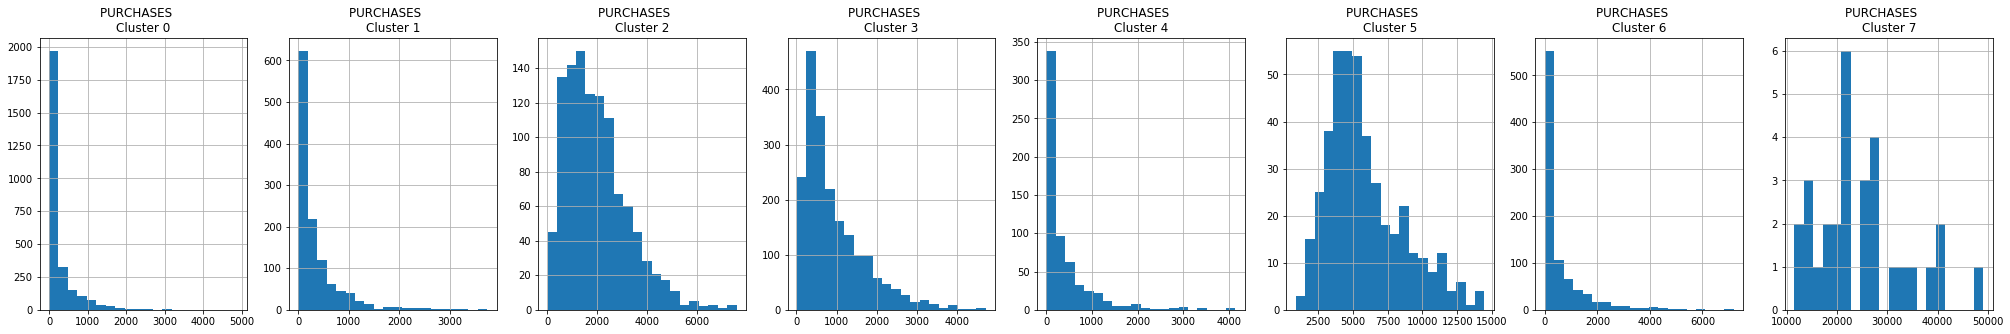

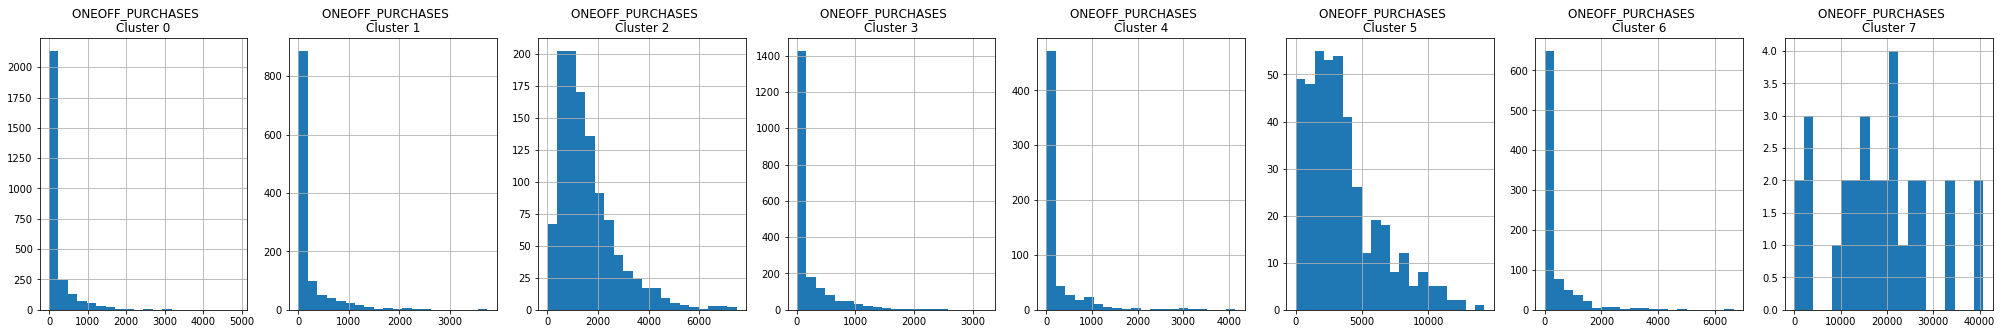

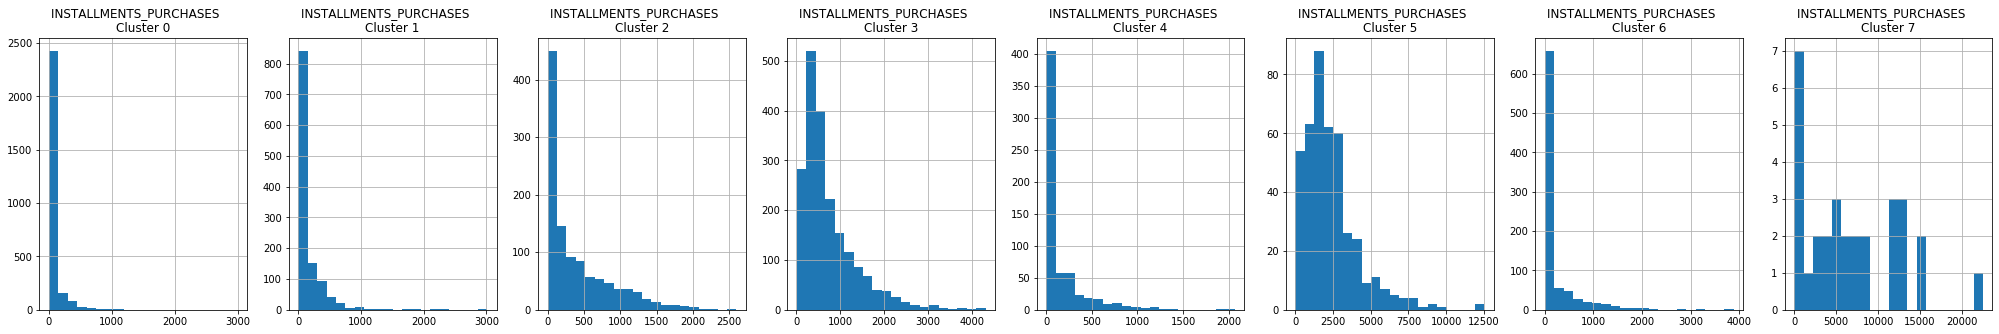

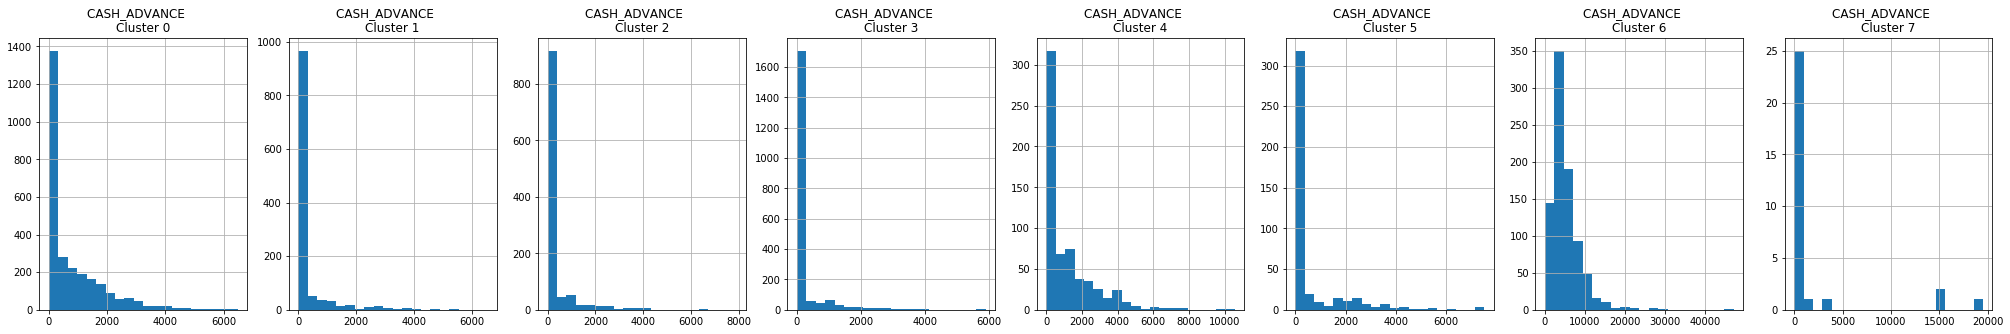

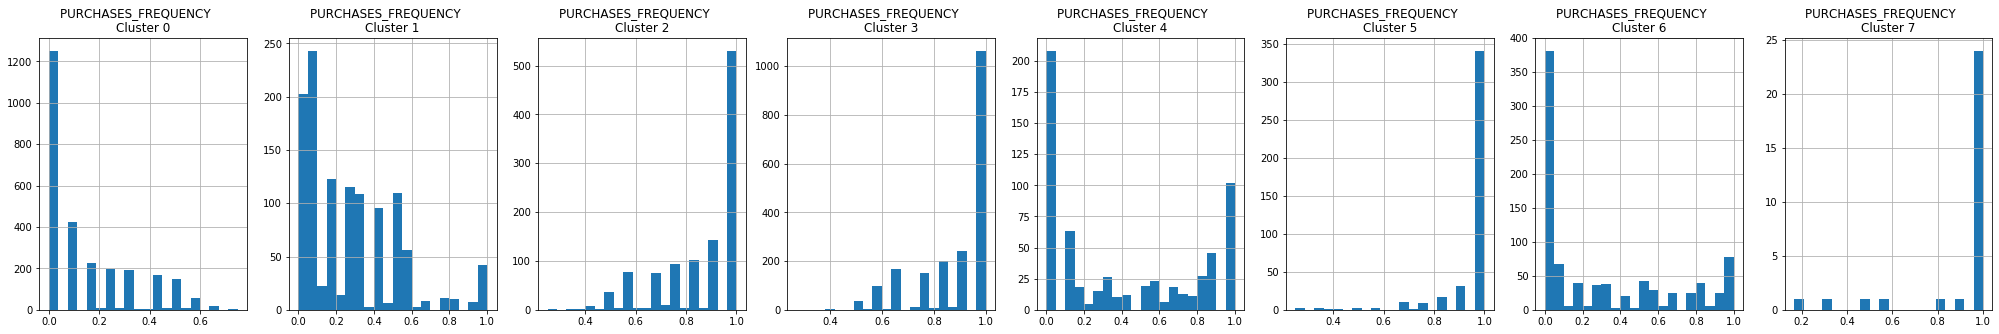

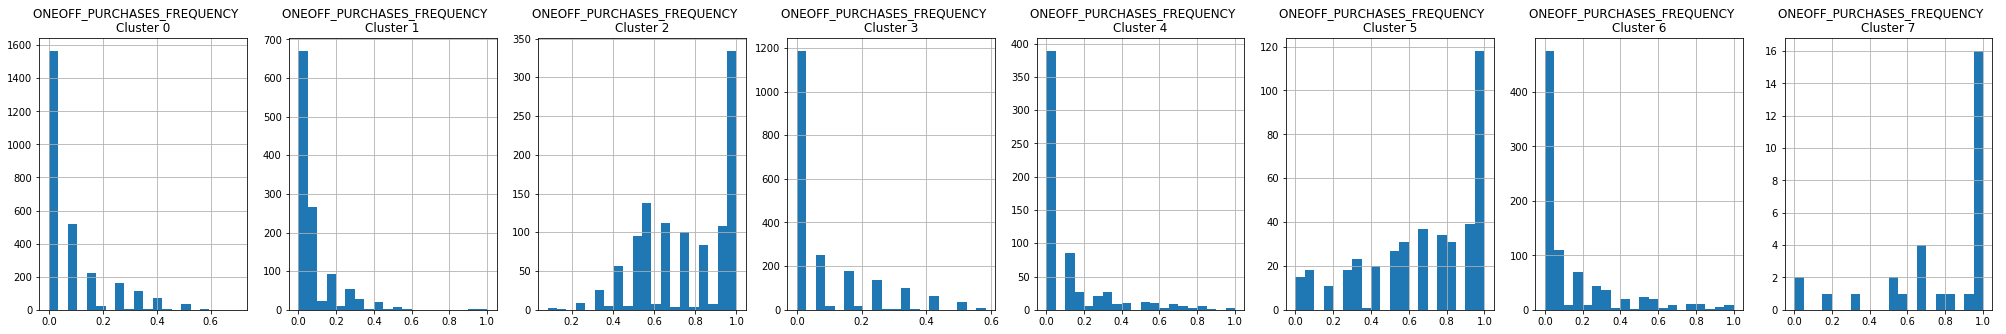

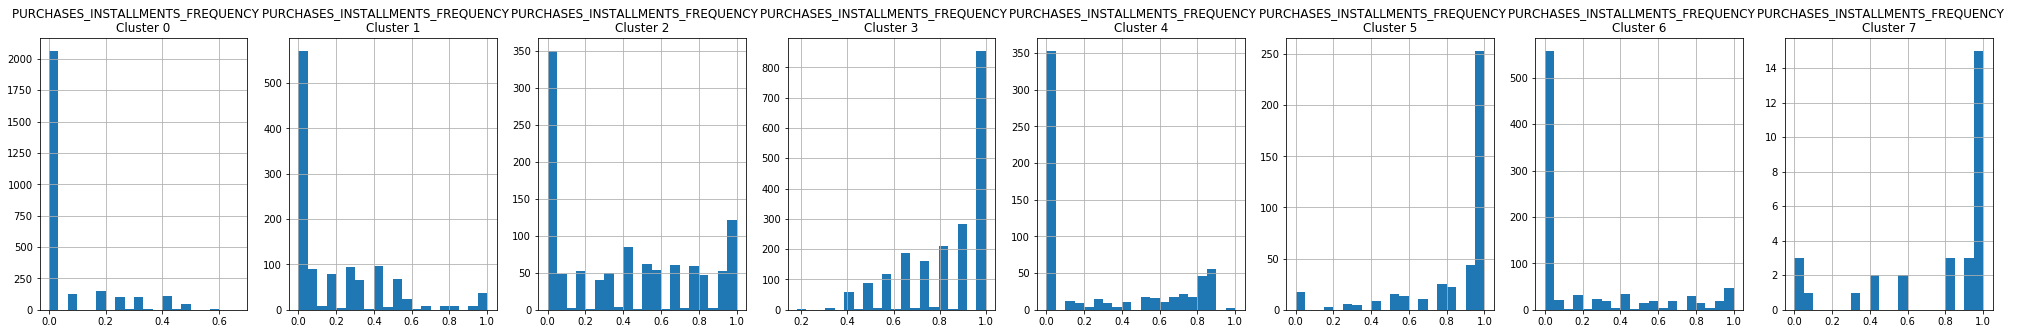

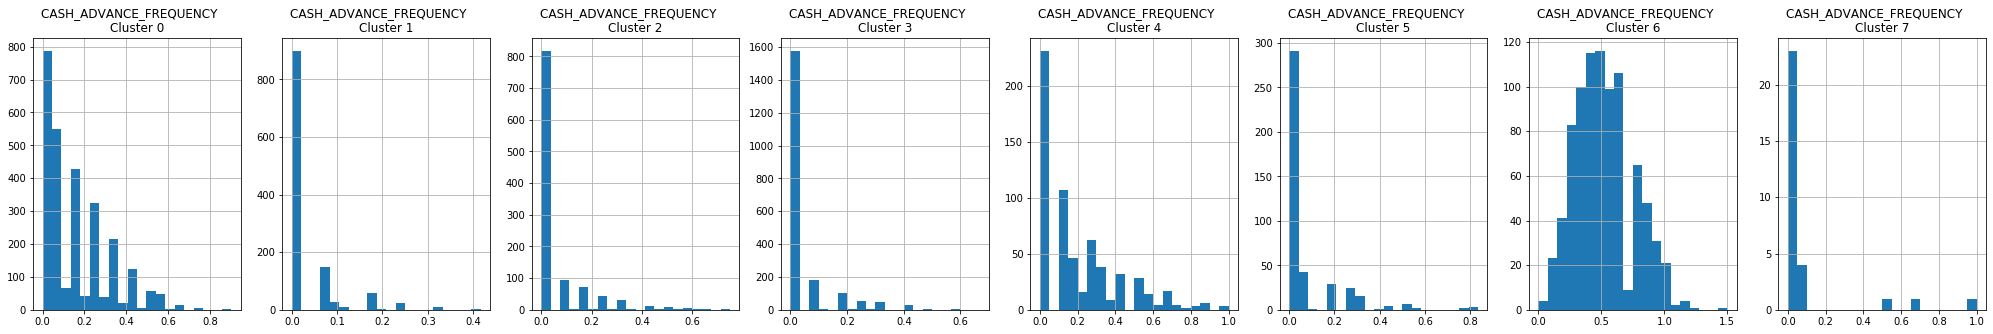

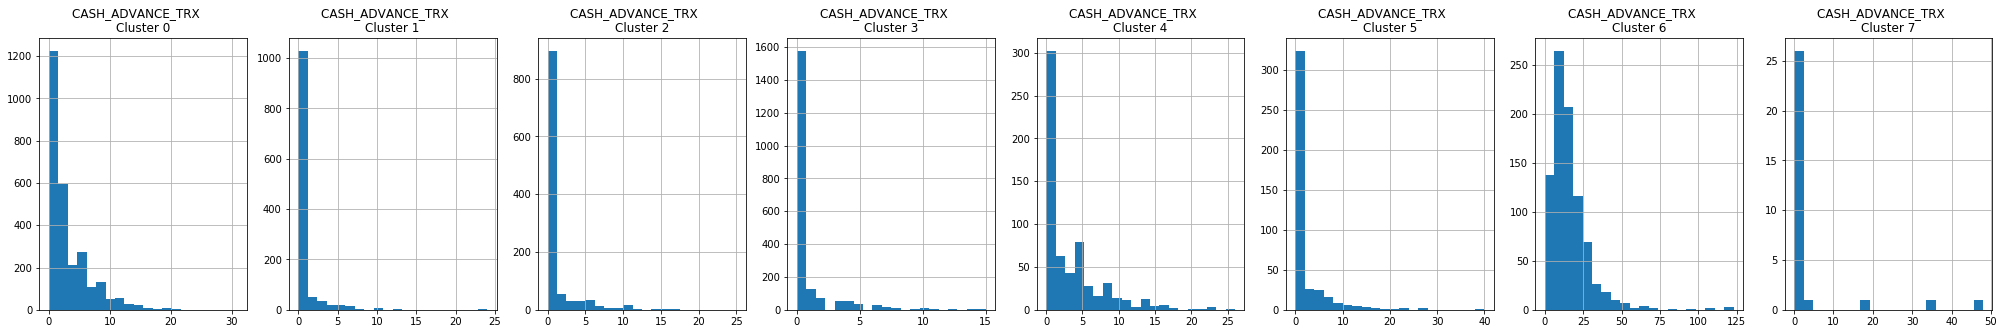

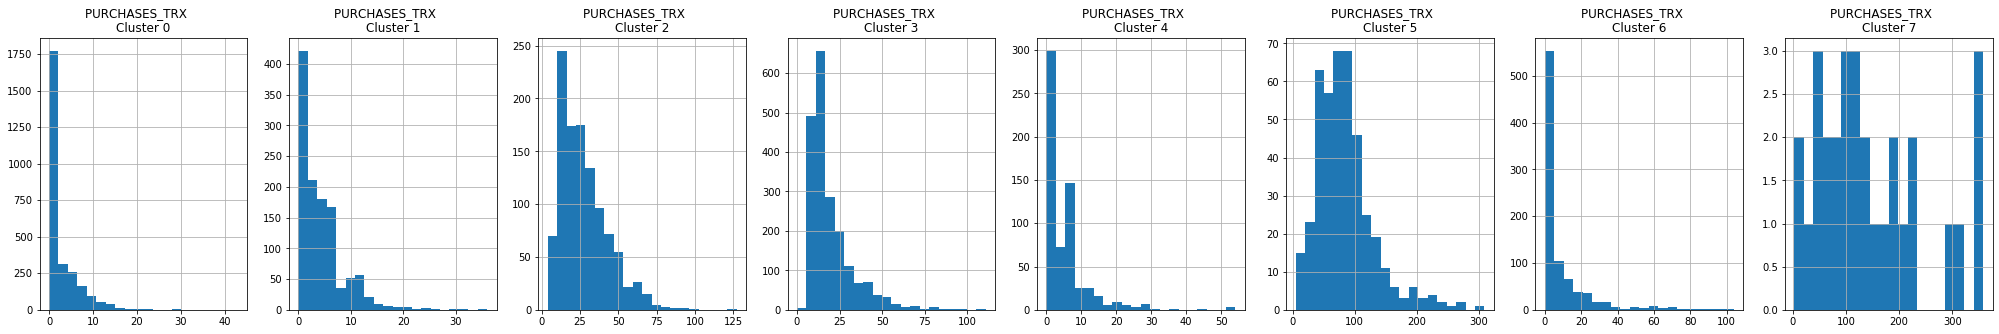

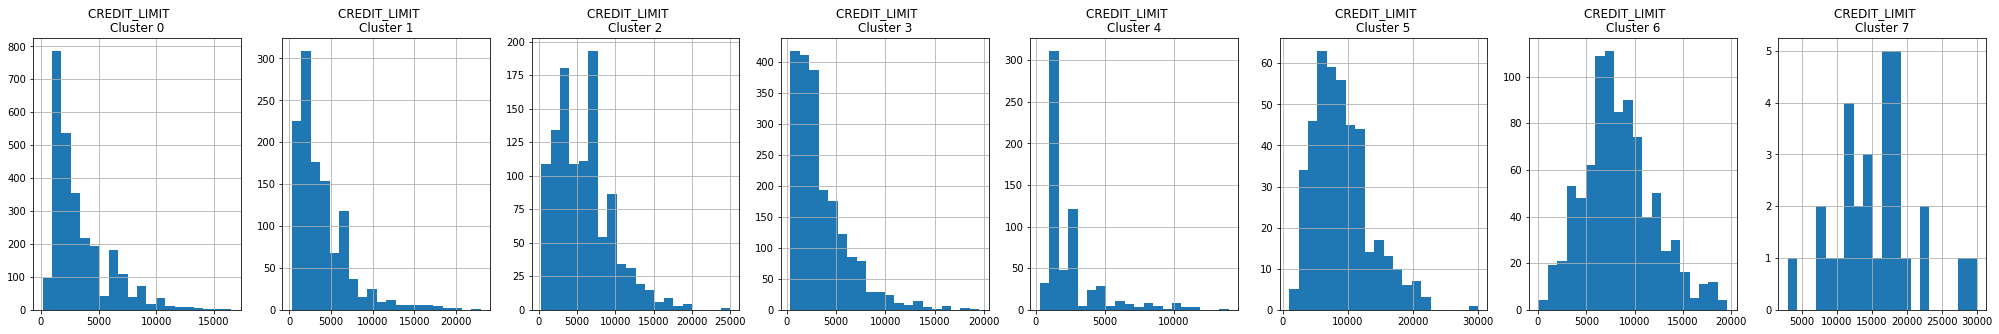

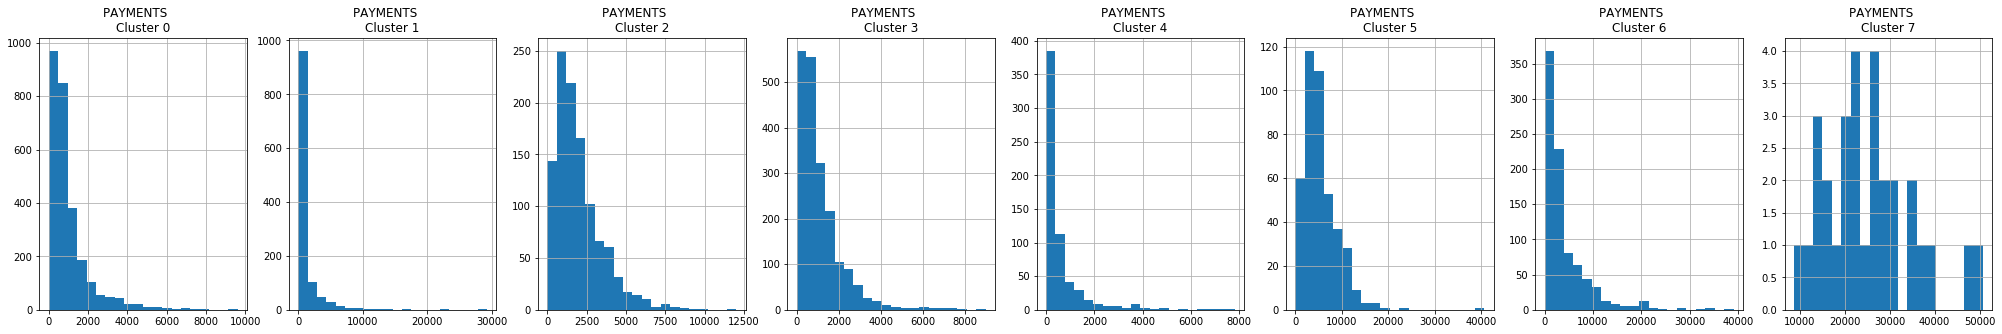

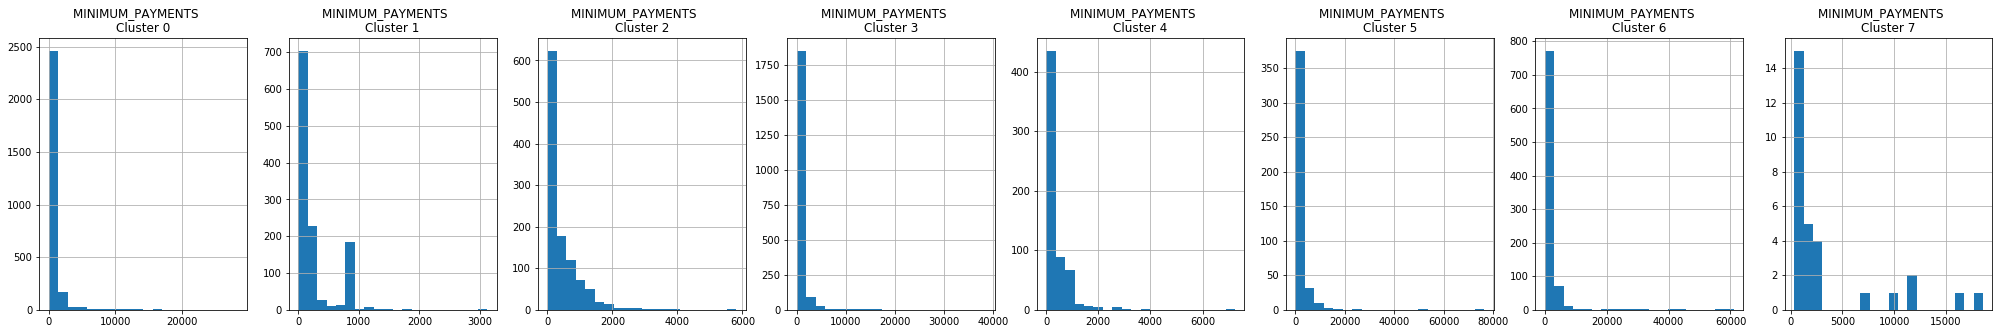

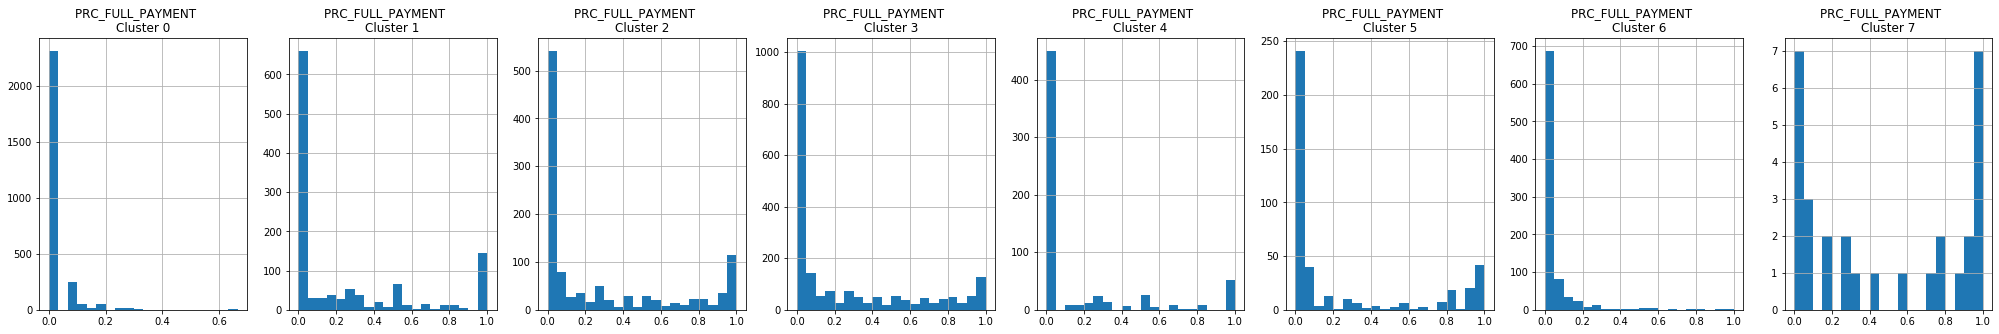

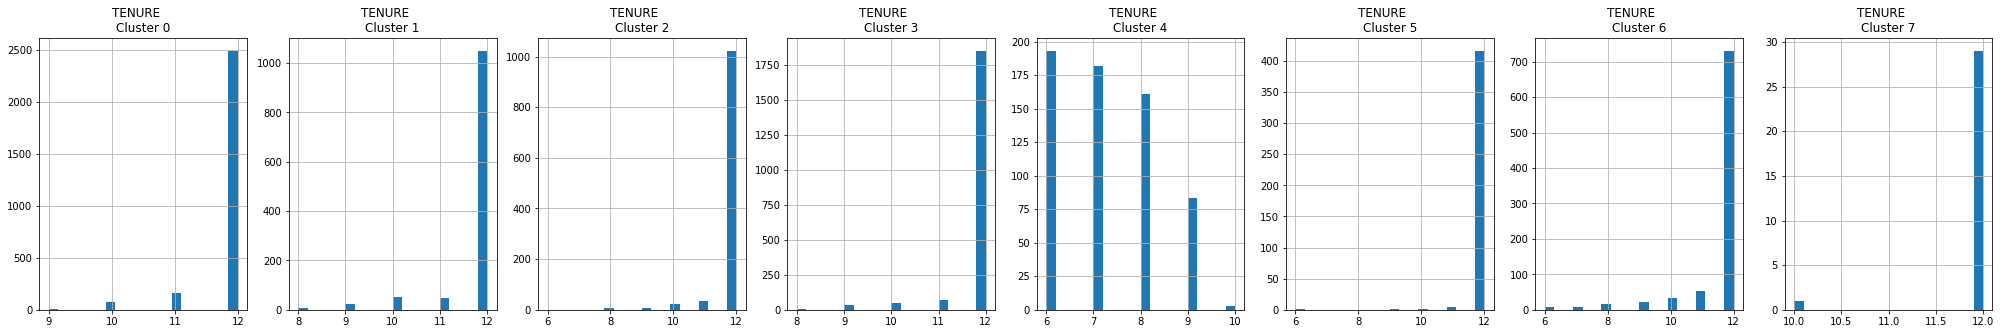

In [47]:
#Lets plot the histograms of all clusters with respect to all variabkes
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster {}'.format(i,j))
        
plt.show()

In [48]:
# When we plot this histogram it is clear to differntiate all the clusters

# PCA

In [49]:
#Obtaining the preinciple component analysis
pca=PCA(n_components=2)
principle_comp = pca.fit_transform(creditcard_df_scaled)
principle_comp

array([[-1.68222073, -1.07644398],
       [-1.13829518,  2.50649511],
       [ 0.9696882 , -0.38354289],
       ...,
       [-0.92620454, -1.81078347],
       [-2.33655452, -0.65796087],
       [-0.55642205, -0.40048245]])

In [50]:
# Lets create datafram of above matrix
pca_df = pd.DataFrame(data=principle_comp,columns=['PCA1','PCA2'])

In [51]:
pca_df.head(10)

PCA1      PCA2
0 -1.682221 -1.076444
1 -1.138295  2.506495
2  0.969688 -0.383543
3 -0.873627  0.043177
4 -1.599435 -0.688578
5  0.251297 -0.780080
6  6.352917 -0.692515
7  0.277104 -1.290734
8 -0.441745 -0.461830
9 -0.562511 -0.366332

In [52]:
# Lets concatenate our clusters to this dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

PCA1      PCA2  cluster
0 -1.682221 -1.076444        0
1 -1.138295  2.506495        6
2  0.969688 -0.383543        2
3 -0.873627  0.043177        0
4 -1.599435 -0.688578        0